In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
%matplotlib inline
flight=pd.read_csv("flights.csv")

In [8]:
flight.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,EV,4160,N11150,JAX,EWR,540,...,743.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,1635,N025AA,ATL,DFW,625,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,119,N271LV,RSW,ATL,800,...,934.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,EV,4936,N738EV,MSP,IAD,900,...,1240.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,DL,2319,N960DL,LGA,MSP,1010,...,1225.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
flight.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5816,2015,12,31,4,UA,436,N69838,IAD,TPA,1230,...,1448.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5817,2015,12,31,4,WN,2265,N626SW,TUL,LAS,1345,...,1523.0,38.0,0,0,NaN,0.0,0.0,8.0,30.0,0.0
5818,2015,12,31,4,MQ,3083,N513MQ,STL,ORD,1358,...,1525.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819,2015,12,31,4,EV,2775,N624AE,SPI,DFW,1411,...,1605.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5820,2015,12,31,4,WN,3479,N719SW,CMH,PHX,1450,...,1734.0,19.0,0,0,NaN,19.0,0.0,0.0,0.0,0.0


In [10]:
print("Total No. of observations : {}".format(len(flight)))

Total No. of observations : 5821


In [11]:
print("Total No. of features : {}".format(len(flight.columns)))

Total No. of features : 31


In [12]:
for col in flight.columns:
    print(col)

YEAR
MONTH
DAY
DAY_OF_WEEK
AIRLINE
FLIGHT_NUMBER
TAIL_NUMBER
ORIGIN_AIRPORT
DESTINATION_AIRPORT
SCHEDULED_DEPARTURE
DEPARTURE_TIME
DEPARTURE_DELAY
TAXI_OUT
WHEELS_OFF
SCHEDULED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
WHEELS_ON
TAXI_IN
SCHEDULED_ARRIVAL
ARRIVAL_TIME
ARRIVAL_DELAY
DIVERTED
CANCELLED
CANCELLATION_REASON
AIR_SYSTEM_DELAY
SECURITY_DELAY
AIRLINE_DELAY
LATE_AIRCRAFT_DELAY
WEATHER_DELAY


In [13]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 5821 non-null   int64  
 1   MONTH                5821 non-null   int64  
 2   DAY                  5821 non-null   int64  
 3   DAY_OF_WEEK          5821 non-null   int64  
 4   AIRLINE              5821 non-null   object 
 5   FLIGHT_NUMBER        5821 non-null   int64  
 6   TAIL_NUMBER          5805 non-null   object 
 7   ORIGIN_AIRPORT       5821 non-null   object 
 8   DESTINATION_AIRPORT  5821 non-null   object 
 9   SCHEDULED_DEPARTURE  5821 non-null   int64  
 10  DEPARTURE_TIME       5730 non-null   float64
 11  DEPARTURE_DELAY      5730 non-null   float64
 12  TAXI_OUT             5728 non-null   float64
 13  WHEELS_OFF           5728 non-null   float64
 14  SCHEDULED_TIME       5821 non-null   int64  
 15  ELAPSED_TIME         5713 non-null   f

In [14]:
print("The missing values in departure delays: {}" .format(flight['DEPARTURE_DELAY'].isnull().sum()))
print("The missing values in Arrival delays: {}" .format(flight['ARRIVAL_DELAY'].isnull().sum()))

The missing values in departure delays: 91
The missing values in Arrival delays: 108


In [15]:
flight[(flight['ARRIVAL_DELAY'].isnull()) | (flight['DEPARTURE_DELAY'].isnull()) ][['ARRIVAL_DELAY','ARRIVAL_TIME','DEPARTURE_DELAY','DEPARTURE_TIME']].head(10)

,ARRIVAL_DELAY,ARRIVAL_TIME,DEPARTURE_DELAY,DEPARTURE_TIME
1,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN
174,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN
350,NaN,NaN,31.0,1221.0
359,NaN,NaN,NaN,NaN


In [16]:
flight.dropna(subset=['DEPARTURE_DELAY','ARRIVAL_DELAY'],inplace=True)

In [17]:
len(flight)

5713

In [18]:
print("The missing values in departure delays: {}" .format(flight['DEPARTURE_DELAY'].isnull().sum()))
print("The missing values in Arrival delays: {}" .format(flight['ARRIVAL_DELAY'].isnull().sum()))

The missing values in departure delays: 0
The missing values in Arrival delays: 0


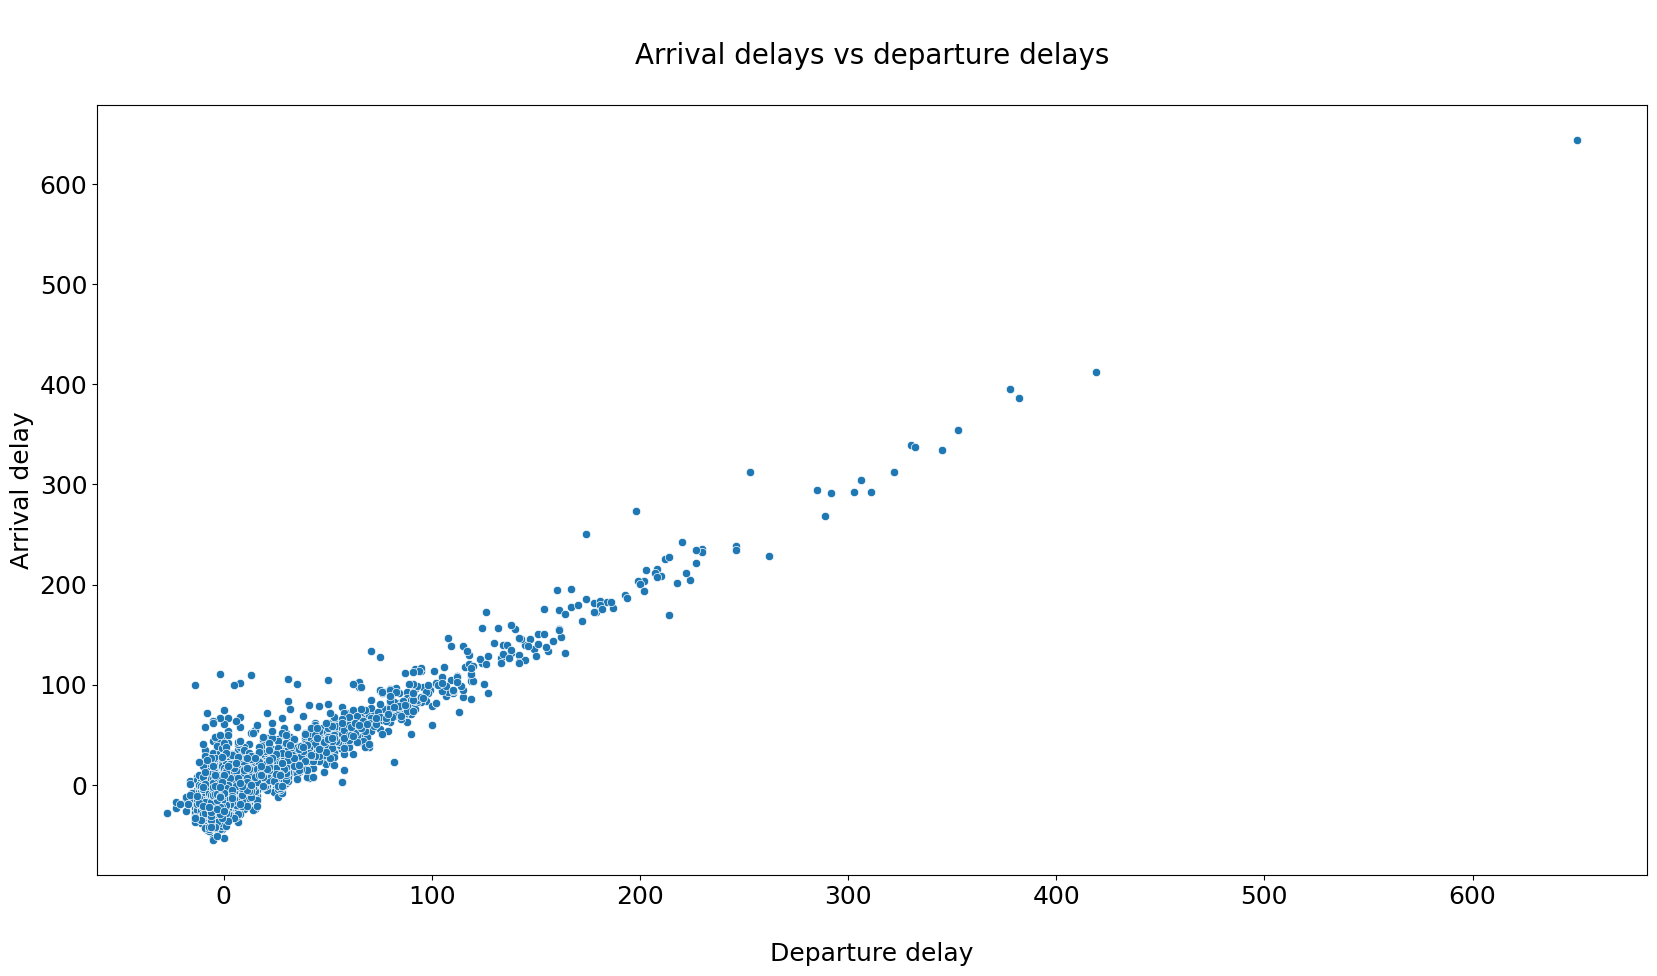

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="DEPARTURE_DELAY",y="ARRIVAL_DELAY",data=flight)
plt.xlabel("\nDeparture delay" ,fontsize=18)
plt.ylabel("Arrival delay" ,fontsize=18)
plt.title("\nArrival delays vs departure delays\n",fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

In [20]:
print("Average departure delay : {} " .format(flight['DEPARTURE_DELAY'].mean()))
print("Median departure delay : {} " .format(flight['DEPARTURE_DELAY'].median()))
print("Average arrival delay : {} " .format(flight['ARRIVAL_DELAY'].mean()))
print("Median arrival delay : {} " .format(flight['ARRIVAL_DELAY'].median()))

Average departure delay : 8.886574479257833 
Median departure delay : -2.0 
Average arrival delay : 3.9882723612812883 
Median arrival delay : -5.0 


In [21]:
print("The No. of airlines : {}".format(flight['AIRLINE'].nunique()))
# Number of observations in each of the 14 airlines
print("The different airlines and their count : \n")
count_air=pd.DataFrame(flight['AIRLINE'].value_counts())
count_air=count_air.rename(columns={'AIRLINE':'COUNT'})
count_air

The No. of airlines : 14
The different airlines and their count : 



,count
AIRLINE,
WN,1269
DL,918
AA,710
OO,575
EV,546
UA,506
MQ,269
B6,257
US,206


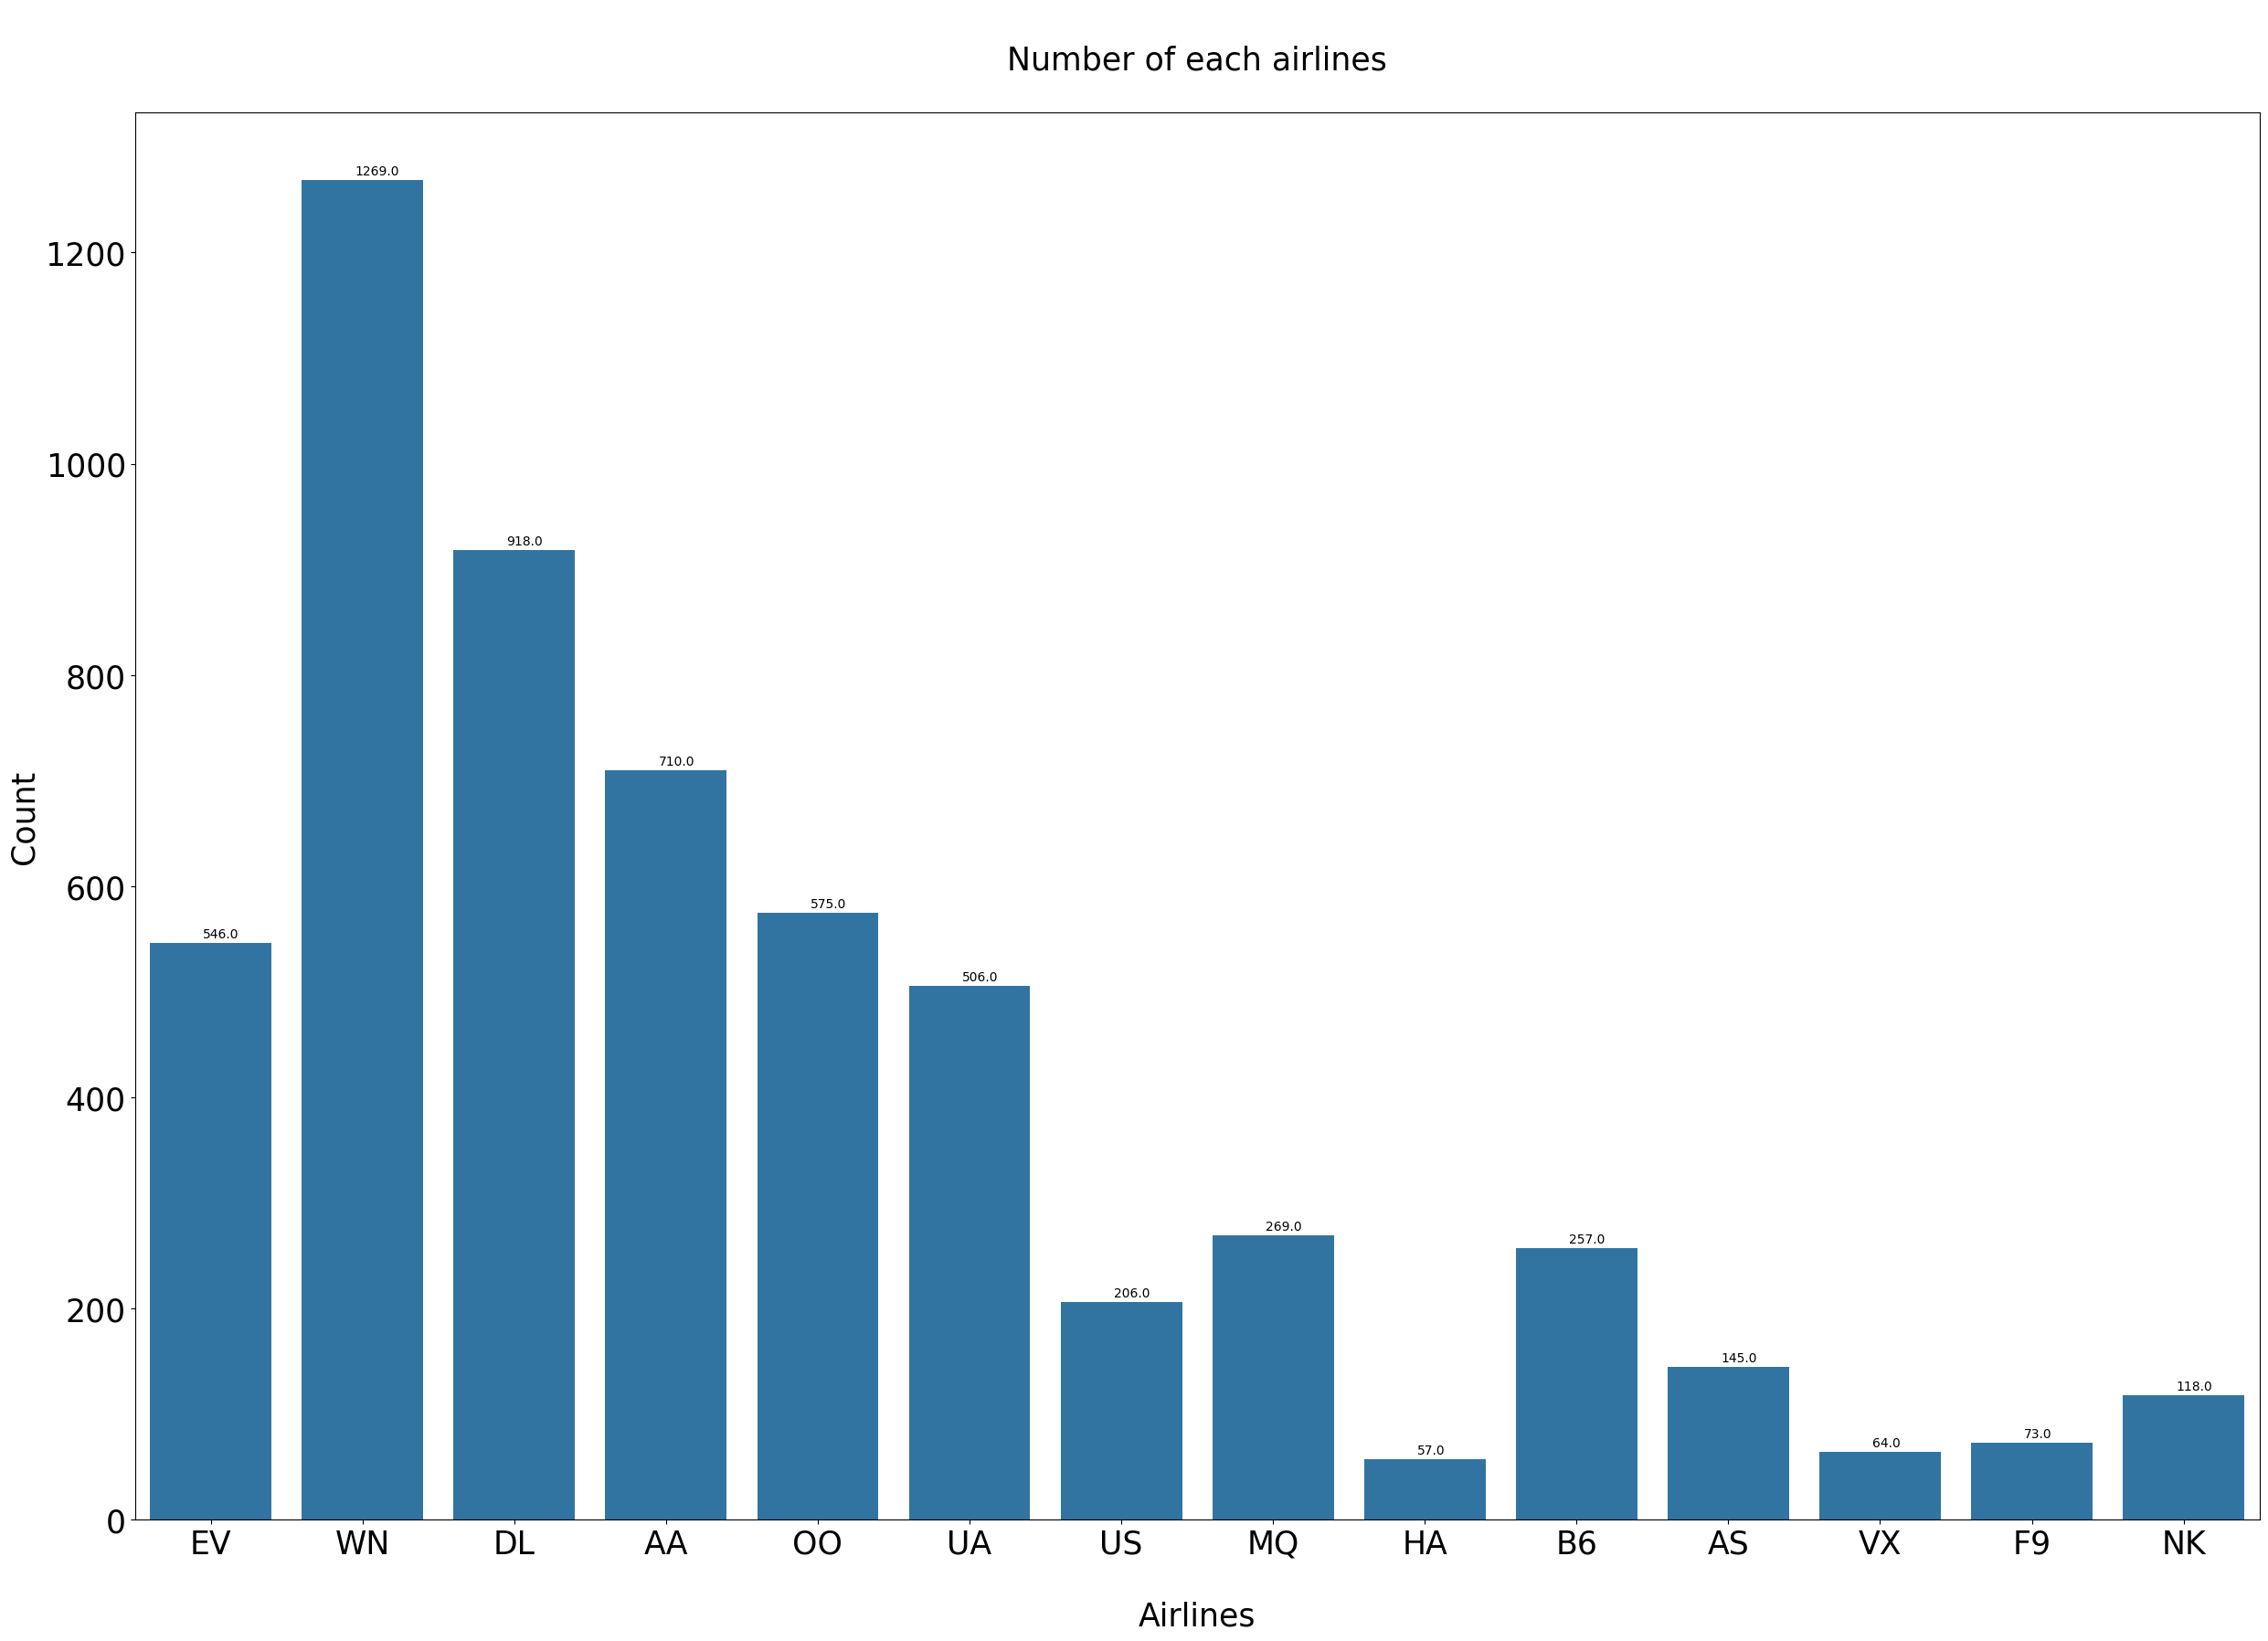

In [22]:
plt.figure(figsize=(30,20))# Creating an empty plot 
ax=sns.countplot(x=flight['AIRLINE'])# Countplot of airlines
plt.tick_params(labelsize=25)# changing the label sizes
plt.xlabel("\nAirlines" ,fontsize=25) # Adding x-label 
plt.ylabel("Count" ,fontsize=25) #Adding y-label
plt.title("\nNumber of each airlines\n",fontsize=25) # Adding plot title
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.35,p.get_height()+5)) # Adding the count above the bars
plt.show()

In [23]:
flightmelt = flight[['AIRLINE', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]
flightmelt = pd.melt(
    flightmelt,
    id_vars=['AIRLINE'],
    var_name='ARRIVAL/DEPARTURE DELAY',
    value_name='DELAY'
)
flightmelt.head()


,AIRLINE,ARRIVAL/DEPARTURE DELAY,DELAY
0,EV,DEPARTURE_DELAY,-9.0
1,WN,DEPARTURE_DELAY,-6.0
2,EV,DEPARTURE_DELAY,1.0
3,DL,DEPARTURE_DELAY,0.0
4,DL,DEPARTURE_DELAY,-2.0


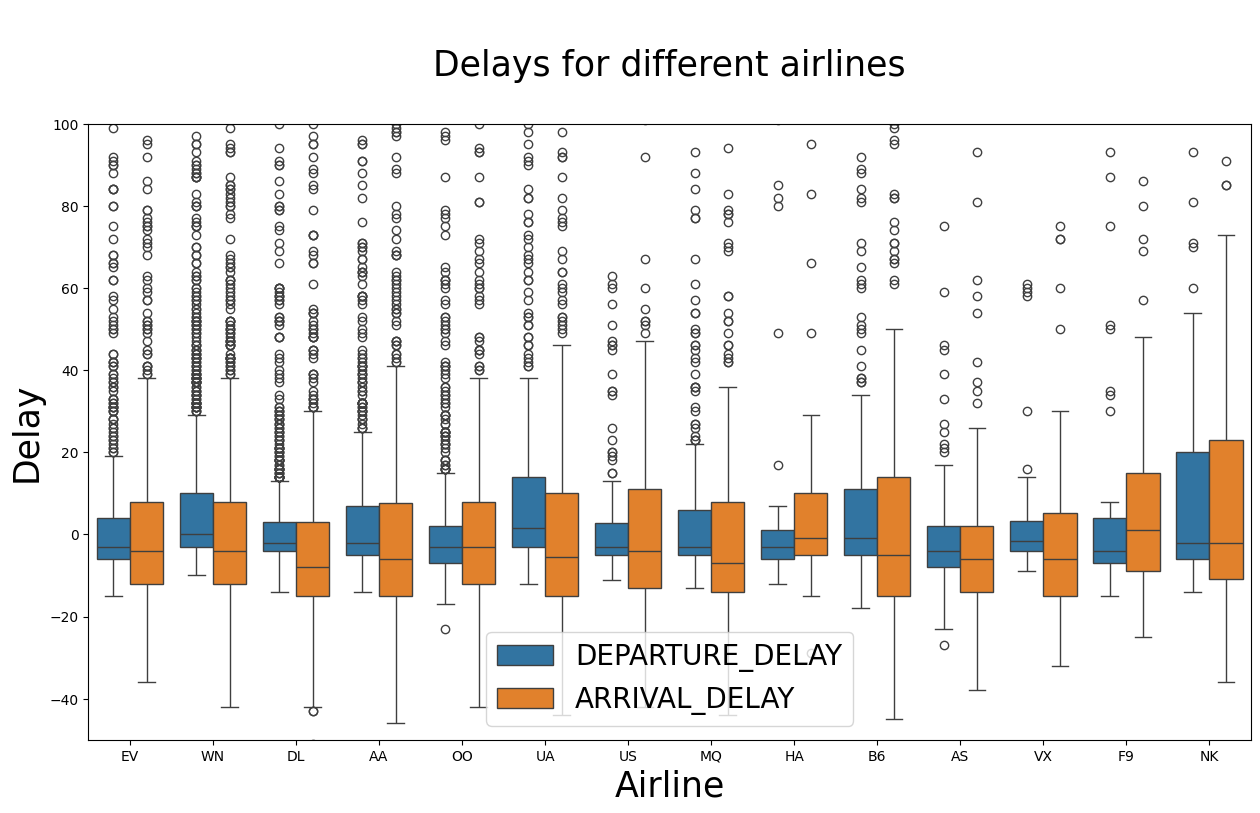

In [24]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='AIRLINE', y='DELAY', hue='ARRIVAL/DEPARTURE DELAY', data=flightmelt)
plt.xlabel("Airline", fontsize=25)
plt.ylabel("Delay", fontsize=25)
plt.legend(fontsize=20)
plt.ylim(-50, 100)  # Corrected here
plt.title("\nDelays for different airlines\n", fontsize=25)
plt.show()


In [25]:
depart_airline_5=flight.groupby('AIRLINE')['DEPARTURE_DELAY'].describe()
depart_airline_5=depart_airline_5[['mean','count','min','25%','50%','75%','max']] #Adding only the information I need to the dataframe
depart_airline_5=depart_airline_5.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'}) # renaming few column names
depart_airline_5=depart_airline_5.sort_values(by='Median',ascending=False) #Rearranging in descending order of median
print("\nDEPARTURE DELAY SUMMARY BASED ON AIRLINES: ")
depart_airline_5


DEPARTURE DELAY SUMMARY BASED ON AIRLINES: 


,mean,count,Min,Q1,Median,Q3,Max
AIRLINE,,,,,,,
UA,13.851779,506.0,-12.0,-3.0,1.5,14.00,332.0
WN,9.894405,1269.0,-10.0,-3.0,0.0,10.00,224.0
B6,13.645914,257.0,-18.0,-5.0,-1.0,11.00,330.0
VX,8.593750,64.0,-9.0,-4.0,-1.5,3.25,230.0
AA,8.349296,710.0,-14.0,-5.0,-2.0,7.00,289.0
DL,7.238562,918.0,-14.0,-4.0,-2.0,3.00,419.0
NK,15.228814,118.0,-14.0,-6.0,-2.0,20.00,353.0
EV,7.461538,546.0,-15.0,-6.0,-3.0,4.00,382.0
HA,7.964912,57.0,-12.0,-6.0,-3.0,1.00,202.0


In [26]:
arr_airline_5=flight.groupby('AIRLINE')['ARRIVAL_DELAY'].describe()
arr_airline_5=arr_airline_5[['mean','count','min','25%','50%','75%','max']]  #Adding only the information I need to the dataframe
arr_airline_5=arr_airline_5.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'}) # renaming few column names
arr_airline_5=arr_airline_5.sort_values(by='Median',ascending=False) #Rearranging in descending order of median
print("\nARRIVAL DELAY SUMMARY BASED ON AIRLINE : ")
arr_airline_5


ARRIVAL DELAY SUMMARY BASED ON AIRLINE : 


,mean,count,Min,Q1,Median,Q3,Max
AIRLINE,,,,,,,
F9,19.150685,73.0,-25.0,-9.00,1.0,15.00,644.0
HA,10.894737,57.0,-29.0,-5.00,-1.0,10.00,194.0
NK,14.881356,118.0,-36.0,-10.75,-2.0,23.00,354.0
OO,4.269565,575.0,-42.0,-12.00,-3.0,8.00,304.0
EV,5.686813,546.0,-36.0,-12.00,-4.0,8.00,386.0
US,5.067961,206.0,-42.0,-13.00,-4.0,11.00,334.0
WN,3.422380,1269.0,-53.0,-12.00,-4.0,8.00,273.0
B6,9.653696,257.0,-45.0,-15.00,-5.0,14.00,339.0
UA,4.693676,506.0,-53.0,-15.00,-5.5,10.00,337.0


In [27]:
depart_airport = flight.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].describe()
depart_airport=depart_airport[['mean','count','min','25%','50%','75%','max']]
depart_airport=depart_airport.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})# renaming few column names
depart_airport=depart_airport.sort_values(by='mean',ascending=False)
depart_airport=depart_airport.head(10)
print("\nDEPARTURE DELAY SUMMARY GROUPEDBY AIRPORT : ")
depart_airport


DEPARTURE DELAY SUMMARY GROUPEDBY AIRPORT : 


,mean,count,Min,Q1,Median,Q3,Max
ORIGIN_AIRPORT,,,,,,,
FAR,161.000000,1.0,161.0,161.00,161.0,161.00,161.0
12898,119.000000,1.0,119.0,119.00,119.0,119.00,119.0
BMI,101.333333,3.0,-5.0,-3.50,-2.0,154.50,311.0
ERI,92.000000,1.0,92.0,92.00,92.0,92.00,92.0
MYR,88.000000,4.0,-6.0,-3.75,2.5,94.25,353.0
14576,88.000000,1.0,88.0,88.00,88.0,88.00,88.0
14696,88.000000,1.0,88.0,88.00,88.0,88.00,88.0
10157,87.500000,2.0,-3.0,42.25,87.5,132.75,178.0
12992,80.000000,1.0,80.0,80.00,80.0,80.00,80.0


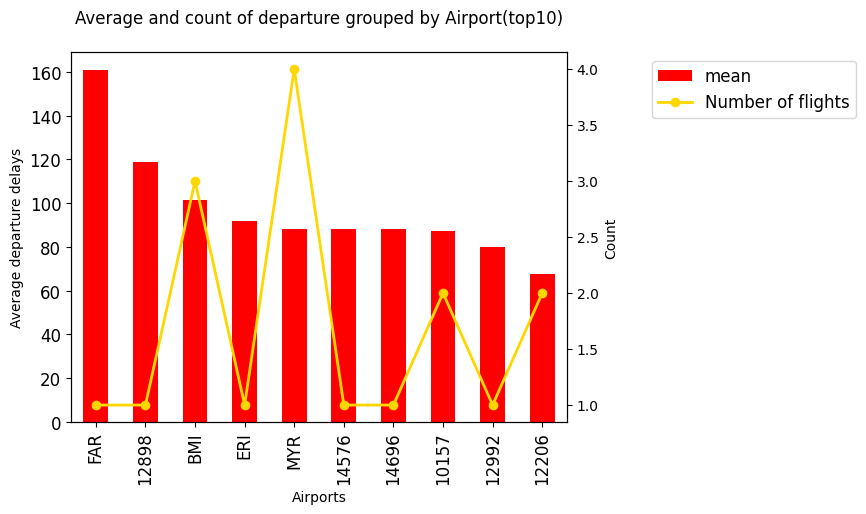

In [28]:
fig = plt.figure() 
ax = depart_airport['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False) # creating a plot of first y axis for mean
ax2 = ax.twinx() 
ax2.plot(ax.get_xticks(),depart_airport['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of flights") #creating a plot for second y axis for count
ax.set_title("Average and count of departure grouped by Airport(top10)\n")
ax.set_xlabel("Airports")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

The above graph and table displays the top 10 airports with the highest average delays. One factor that the above airports have in common is that the number of flights departing from the airport is very few. Since the number of flights is very less, one late flight will increase the average delay. Hector International airport(FAR) seems like an unpopular airport with the highest average departure delay of 161 minutes but only one single flight.

In [29]:
depart_delay_positive=flight[(flight['DEPARTURE_DELAY']>0) ]
depart_delay_positive['DEPARTURE_DELAY']

3        1.0
7       32.0
12      13.0
14      12.0
15       6.0
        ... 
5813    22.0
5814     4.0
5817    38.0
5818     8.0
5820     2.0
Name: DEPARTURE_DELAY, Length: 2115, dtype: float64

In [30]:
depart_dist=flight[['DEPARTURE_DELAY','DISTANCE']].sort_values(by=['DISTANCE','DEPARTURE_DELAY'],ascending=False)
depart_dist.head(15)

,DEPARTURE_DELAY,DISTANCE
2583,-7.0,4983
1529,-9.0,4983
3495,1.0,4817
1280,0.0,4817
1684,-3.0,4502
3511,23.0,3801
2820,19.0,3417
4522,5.0,3365
5762,8.0,3329
3969,25.0,3043


In [31]:
depart_dist.tail(15)

,DEPARTURE_DELAY,DISTANCE
609,-3.0,73
557,0.0,69
5234,2.0,68
3473,0.0,68
1432,-8.0,68
5190,78.0,67
187,24.0,67
3695,15.0,67
2190,0.0,67
678,-9.0,67


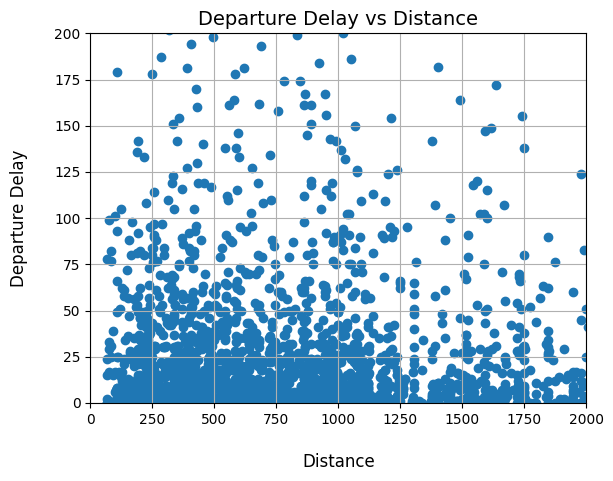

In [32]:
plt.scatter(x=flight['DISTANCE'], y=flight['DEPARTURE_DELAY'])
plt.xlim(0, 2000)     
plt.ylim(0, 200)      
plt.xlabel("\nDistance", fontsize=12)
plt.ylabel("Departure Delay\n", fontsize=12)
plt.title("Departure Delay vs Distance", fontsize=14)
plt.grid(True)
plt.show()

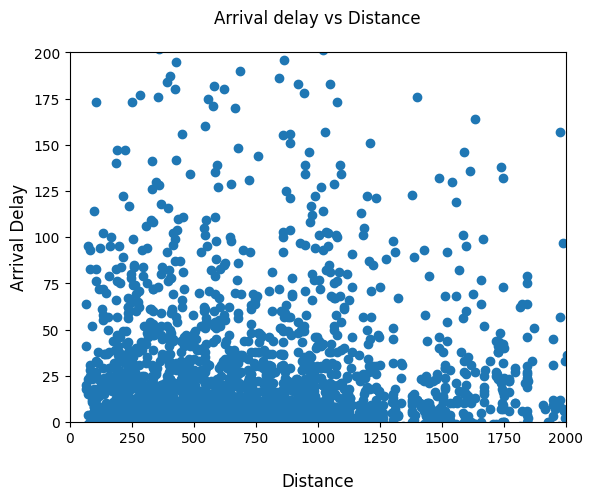

In [33]:
plt.scatter(x=flight['DISTANCE'],y=flight['ARRIVAL_DELAY']) 
plt.xlim(0,2000)
plt.ylim(0,200) 
plt.xlabel("\nDistance" ,fontsize=12)
plt.ylabel("Arrival Delay" ,fontsize=12)
plt.title("Arrival delay vs Distance\n")
plt.show()

In [34]:
flight[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].corr()

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
DEPARTURE_DELAY,1.000000,0.936069,0.023095
ARRIVAL_DELAY,0.936069,1.000000,-0.027935
DISTANCE,0.023095,-0.027935,1.000000


In [35]:
depart_delay_positive[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].sort_values(by='DISTANCE',ascending=False).head(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
3495,1.0,-18.0,4817
3511,23.0,10.0,3801
2820,19.0,48.0,3417
4522,5.0,-13.0,3365
5762,8.0,-19.0,3329
3969,25.0,26.0,3043
5814,4.0,-13.0,2979
5530,13.0,-6.0,2845
728,1.0,-38.0,2717
2513,4.0,-23.0,2704


In [36]:
depart_delay_positive[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].sort_values(by='DISTANCE',ascending=False).tail(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
81,25.0,31.0,83
1053,17.0,15.0,74
3442,33.0,23.0,74
503,99.0,95.0,73
2818,1.0,-3.0,73
4062,29.0,17.0,73
5234,2.0,-8.0,68
5190,78.0,64.0,67
187,24.0,20.0,67
3695,15.0,18.0,67


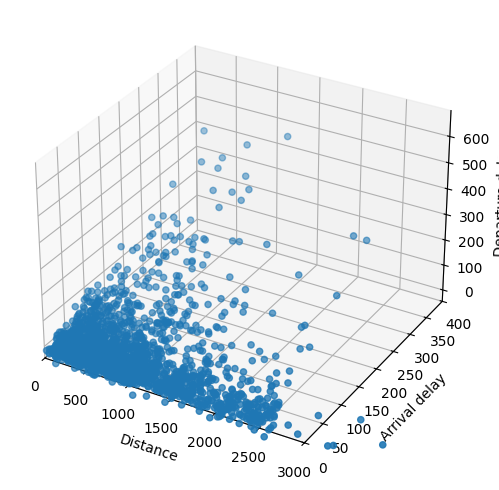

In [37]:
from mpl_toolkits.mplot3d import Axes3D # 3d plot
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(depart_delay_positive['DISTANCE'],depart_delay_positive['ARRIVAL_DELAY'],depart_delay_positive['DEPARTURE_DELAY'])
ax.set_xlabel('Distance')
ax.set_ylabel('Arrival delay')
ax.set_zlabel('Departure delay')
plt.xlim(0,3000)
plt.ylim(0,400)
plt.show()

In [38]:
depart_dow = flight.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].describe()
depart_dow=depart_dow[['mean','count','min','25%','50%','75%','max']]
depart_dow=depart_dow.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
print("\nDEPARTURE DELAY SUMMARY GROUPED BY DAY OF WEEK : ")
depart_dow


DEPARTURE DELAY SUMMARY GROUPED BY DAY OF WEEK : 


,mean,count,Min,Q1,Median,Q3,Max
DAY_OF_WEEK,,,,,,,
1,9.786826,835.0,-17.0,-5.0,-2.0,8.0,382.0
2,8.995006,801.0,-18.0,-5.0,-2.0,6.0,330.0
3,7.488971,816.0,-16.0,-5.0,-2.0,6.0,345.0
4,9.390443,858.0,-18.0,-4.0,-1.0,8.0,419.0
5,9.661148,906.0,-16.0,-4.0,-1.0,8.0,311.0
6,7.125894,699.0,-27.0,-5.0,-2.0,5.0,353.0
7,9.385965,798.0,-23.0,-5.0,-1.0,9.0,650.0


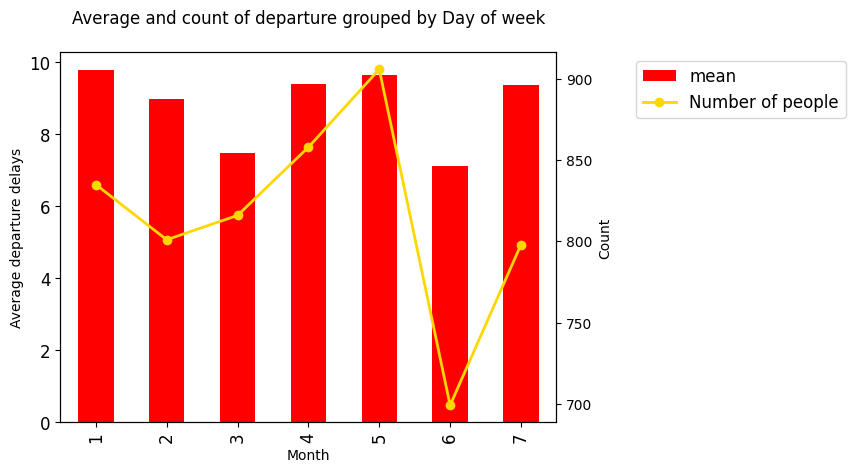

In [39]:
fig = plt.figure()
ax = depart_dow['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),depart_dow['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of departure grouped by Day of week\n")
ax.set_xlabel("Month")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

According to the above table and graph , the best day of the week to travel to experience least departure delay is Saturday-6 with a mean of 7.12. The highest departure delay is on Monday-1 with a mean of 9.7.

In [40]:
arr_dow=flight.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].describe()
arr_dow=arr_dow[['mean','count','min','25%','50%','75%','max']]
arr_dow=arr_dow.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
print("\nARRIVAL DELAY SUMMARY GROUPED BY DAY OF WEEK : ")
arr_dow


ARRIVAL DELAY SUMMARY GROUPED BY DAY OF WEEK : 


,mean,count,Min,Q1,Median,Q3,Max
DAY_OF_WEEK,,,,,,,
1,5.104192,835.0,-44.0,-13.00,-5.0,7.0,386.0
2,3.863920,801.0,-43.0,-14.00,-6.0,8.0,339.0
3,2.458333,816.0,-55.0,-14.00,-6.0,8.0,334.0
4,5.627040,858.0,-42.0,-12.00,-4.5,10.0,412.0
5,4.716336,906.0,-45.0,-13.00,-5.0,9.0,304.0
6,1.133047,699.0,-53.0,-15.00,-6.0,4.0,354.0
7,4.422306,798.0,-53.0,-13.75,-5.0,9.0,644.0


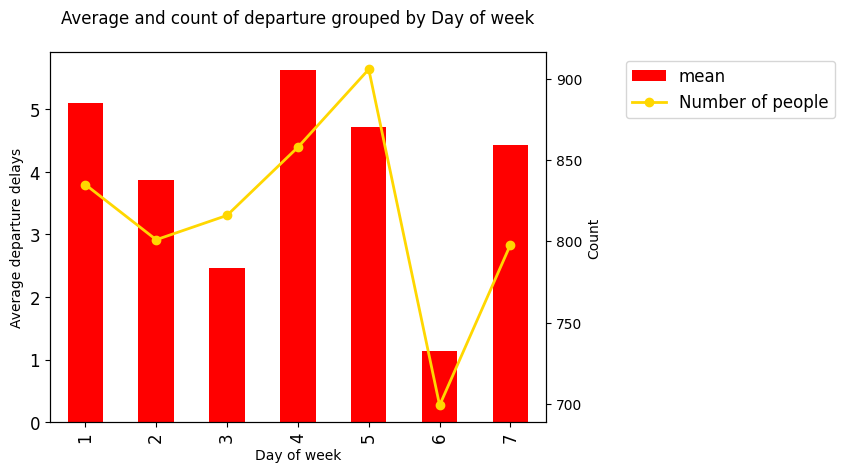

In [41]:
fig = plt.figure()
ax = arr_dow['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),depart_dow['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of departure grouped by Day of week\n")
ax.set_xlabel("Day of week")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

According to the above table and graph , the best day of the week to travel to experience least arrival delay is Saturday-6 with a mean of 1.13 minutes. The highest departure delay is on Thursday-4 with a mean of 5.62 minutes.

In [42]:
delay_type=pd.DataFrame(flight['AIR_SYSTEM_DELAY'].describe())
delay_type['SECURITY_DELAY']=pd.DataFrame(flight['SECURITY_DELAY'].describe())
delay_type['AIRLINE_DELAY']=pd.DataFrame(flight['AIRLINE_DELAY'].describe())
delay_type['LATE_AIRCRAFT_DELAY']=pd.DataFrame(flight['LATE_AIRCRAFT_DELAY'].describe())
delay_type['WEATHER_DELAY']=pd.DataFrame(flight['WEATHER_DELAY'].describe())
delay_type=pd.DataFrame(delay_type.iloc[1])
delay_type

,mean
AIR_SYSTEM_DELAY,14.319963
SECURITY_DELAY,0.113806
AIRLINE_DELAY,18.119403
LATE_AIRCRAFT_DELAY,20.514925
WEATHER_DELAY,3.616604


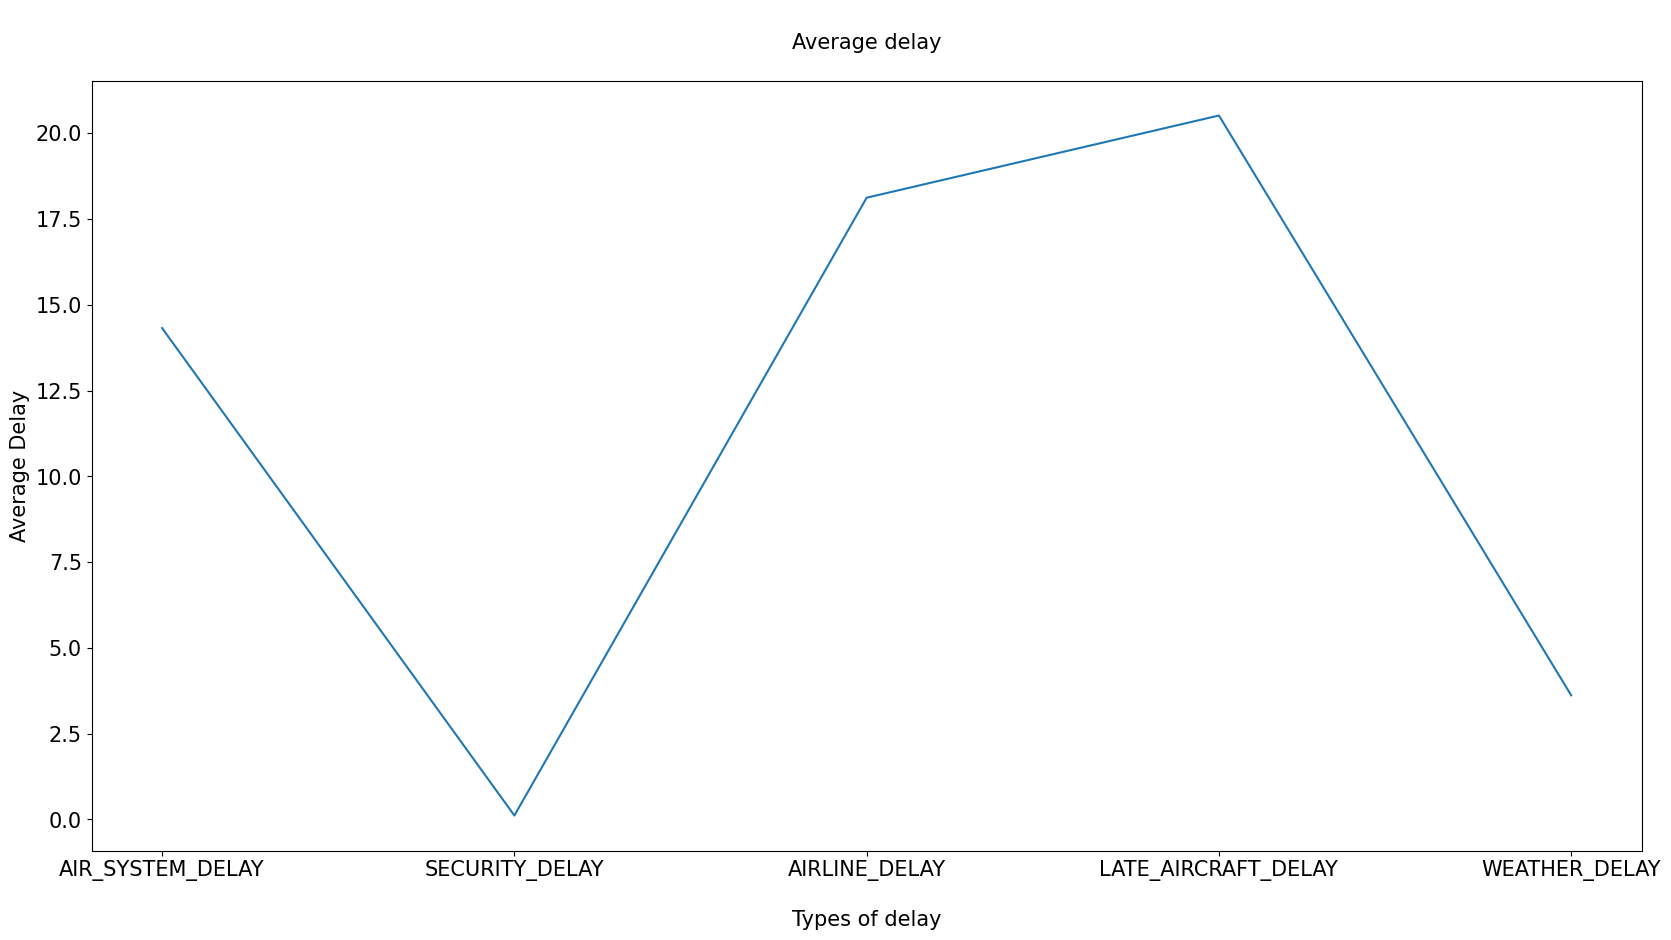

In [43]:
plt.figure(figsize=(20,10))
plt.plot(delay_type)
plt.tick_params(labelsize=15)
plt.xlabel("\nTypes of delay" ,fontsize=15)
plt.ylabel("Average Delay" ,fontsize=15)
plt.title("\nAverage delay\n",fontsize=15)
plt.show()

The highest delay is due to delay caused by the aircraft with an average of 20.51 minutes. Whereas, the least delay is caused due to security with an average of 0.11 minutes.

In [44]:
arr_mon = flight.groupby('MONTH')['ARRIVAL_DELAY'].describe()
arr_mon = arr_mon[['mean','count','min','25%','50%','75%','max']]
arr_mon=arr_mon.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
print("\nARRIVAL DELAY SUMMARY GROUPED BY MONTH : ")
arr_mon


ARRIVAL DELAY SUMMARY GROUPED BY MONTH : 


,mean,count,Min,Q1,Median,Q3,Max
MONTH,,,,,,,
1,2.663438,413.0,-40.0,-13.0,-5.0,7.0,395.0
2,5.921717,396.0,-42.0,-13.0,-4.0,9.0,292.0
3,7.189555,517.0,-53.0,-13.0,-4.0,11.0,412.0
4,2.601578,507.0,-45.0,-13.0,-6.0,7.0,334.0
5,5.843612,454.0,-36.0,-13.0,-4.0,10.0,226.0
6,8.571695,537.0,-55.0,-12.0,-3.0,12.0,312.0
7,7.605159,504.0,-36.0,-12.0,-3.0,13.0,644.0
8,6.121951,492.0,-44.0,-12.0,-4.0,8.0,354.0
9,-2.253165,474.0,-46.0,-16.0,-8.0,1.0,268.0


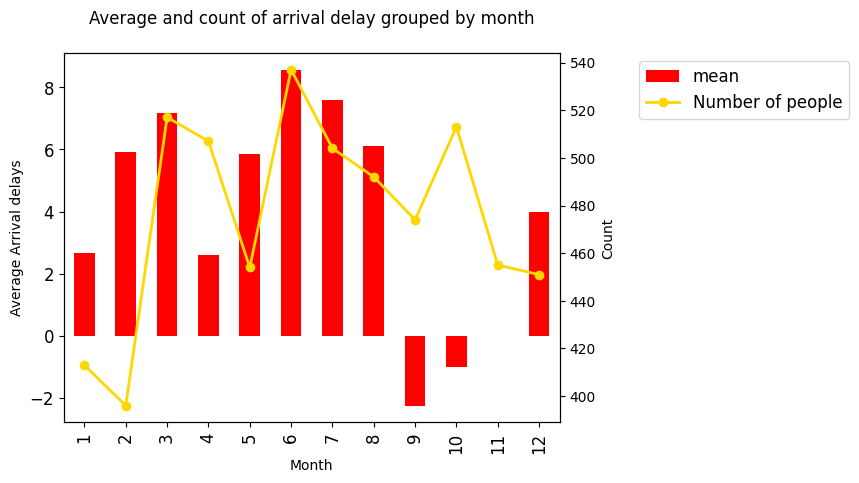

In [45]:
fig = plt.figure()
ax = arr_mon['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),arr_mon['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of arrival delay grouped by month\n")
ax.set_xlabel("Month")
ax.set_ylabel("Average Arrival delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

We analyze the arrival delay grouped month wise. It is interesting to note that, September (9), October (10) and November (11) have a negative average arrival delay. This means that on those months on an average the flights have reached earlier than scheduled. The high average delay is on June (6) with a average delay of 8.57 minutes. We can make assumptions for why this is the case – (1) More number of people travel in the summer months as schools are off, so this can increase air-traffic or airports can be small to accommodate so many aircrafts or airlines may be short staffed. (2) A similar reason as to why there is negative delays in months -9,10,11, not many people are travelling, so fewer aircrafts, easier to handle and reduce delays.

In [46]:
depart_mon=flight.groupby('MONTH')['DEPARTURE_DELAY'].describe()
depart_mon=depart_mon[['mean','count','min','25%','50%','75%','max']]
depart_mon=depart_mon.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
print("\nDEPARTURE DELAY SUMMARY GROUPED BY MONTH : ")
depart_mon


DEPARTURE DELAY SUMMARY GROUPED BY MONTH : 


,mean,count,Min,Q1,Median,Q3,Max
MONTH,,,,,,,
1,7.532688,413.0,-18.0,-5.00,-1.0,8.00,378.0
2,9.603535,396.0,-15.0,-5.00,-1.0,8.00,303.0
3,12.353965,517.0,-16.0,-4.00,-1.0,12.00,419.0
4,7.252465,507.0,-23.0,-5.00,-2.0,7.00,345.0
5,10.544053,454.0,-15.0,-5.00,-1.0,9.75,212.0
6,11.832402,537.0,-14.0,-4.00,-1.0,10.00,322.0
7,12.644841,504.0,-18.0,-4.00,0.0,13.00,650.0
8,10.008130,492.0,-18.0,-4.25,-1.0,7.00,353.0
9,4.854430,474.0,-23.0,-6.00,-3.0,1.00,289.0


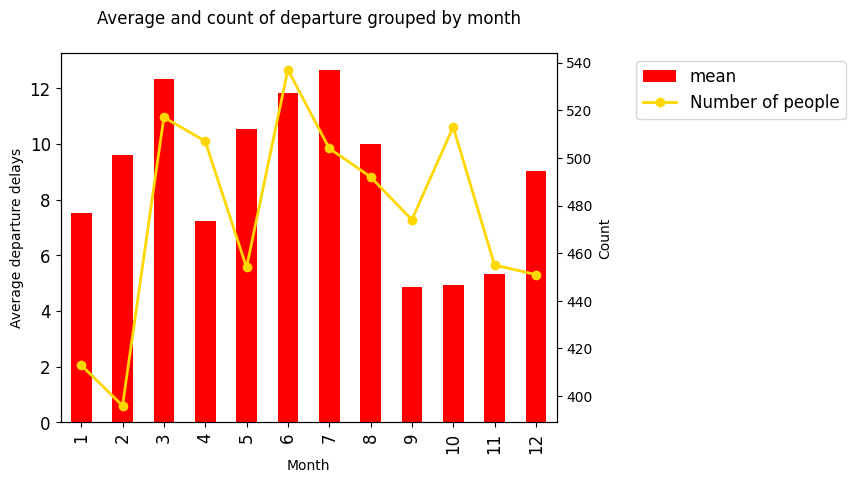

In [47]:
fig = plt.figure()
ax = depart_mon['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),arr_mon['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of departure grouped by month\n")
ax.set_xlabel("Month")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

In [48]:
flight.dropna(subset=["WEATHER_DELAY"],how="all",inplace=True)

In [49]:
flight.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER               0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME            0
DEPARTURE_DELAY           0
TAXI_OUT                  0
WHEELS_OFF                0
SCHEDULED_TIME            0
ELAPSED_TIME              0
AIR_TIME                  0
DISTANCE                  0
WHEELS_ON                 0
TAXI_IN                   0
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME              0
ARRIVAL_DELAY             0
DIVERTED                  0
CANCELLED                 0
CANCELLATION_REASON    1072
AIR_SYSTEM_DELAY          0
SECURITY_DELAY            0
AIRLINE_DELAY             0
LATE_AIRCRAFT_DELAY       0
WEATHER_DELAY             0
dtype: int64

In [50]:
Airline_dummy=pd.get_dummies(flight['AIRLINE'],prefix='Airline') #Geting dummy variables for "Airline" and prefixing it with airline for clarity
del Airline_dummy['Airline_AA'] #droping the first column of Airline "AA"
dayweek_dummy=pd.get_dummies(flight['DAY_OF_WEEK'],prefix='Dayofweek') #Geting dummy variables for "Day of week" and prefixing it with Dayofweek for clarity
del dayweek_dummy['Dayofweek_1'] #droping the first column of dayofweek "1"
flight=pd.concat([flight,Airline_dummy,dayweek_dummy],axis=1) #Adding the dummy variables to the original dataset
flight.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,Airline_UA,Airline_US,Airline_VX,Airline_WN,Dayofweek_2,Dayofweek_3,Dayofweek_4,Dayofweek_5,Dayofweek_6,Dayofweek_7
7,2015,1,1,4,OO,5354,N472CA,ORD,MBS,1317,...,False,False,False,False,False,False,True,False,False,False
9,2015,1,1,4,UA,1062,N73291,DCA,DEN,1603,...,True,False,False,False,False,False,True,False,False,False
19,2015,1,2,5,US,2065,N534UW,CLT,IAH,1120,...,False,True,False,False,False,False,False,True,False,False
21,2015,1,2,5,OO,5211,N943SW,IDA,DEN,1338,...,False,False,False,False,False,False,False,True,False,False
22,2015,1,2,5,HA,335,N477HA,OGG,HNL,1503,...,False,False,False,False,False,False,False,True,False,False


In [51]:
X_cat_1=flight.iloc[:,31:] # Adding only the categorical dummy variables 
X_num_1=flight[['LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','AIR_SYSTEM_DELAY','WEATHER_DELAY','DEPARTURE_TIME','DEPARTURE_DELAY','DISTANCE']]#Adding only the nuermical variables
X_1=pd.concat([X_num_1,X_cat_1],axis=1) #Combining them
X_1.head()

,LATE_AIRCRAFT_DELAY,AIRLINE_DELAY,AIR_SYSTEM_DELAY,WEATHER_DELAY,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,Airline_AS,Airline_B6,Airline_DL,...,Airline_UA,Airline_US,Airline_VX,Airline_WN,Dayofweek_2,Dayofweek_3,Dayofweek_4,Dayofweek_5,Dayofweek_6,Dayofweek_7
7,21.0,11.0,4.0,0.0,1349.0,32.0,222,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9,0.0,0.0,23.0,0.0,1603.0,0.0,1476,False,False,False,...,True,False,False,False,False,False,True,False,False,False
19,0.0,8.0,13.0,0.0,1128.0,8.0,912,False,False,False,...,False,True,False,False,False,False,False,True,False,False
21,50.0,0.0,31.0,0.0,1428.0,50.0,458,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22,89.0,25.0,0.0,0.0,1644.0,101.0,100,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [53]:
y_1=flight['ARRIVAL_DELAY']

{'whiskers': [<matplotlib.lines.Line2D at 0x17d557fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x17d59e580>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d557d60>],
 'medians': [<matplotlib.lines.Line2D at 0x17d59eac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d59ed60>],
 'means': []}

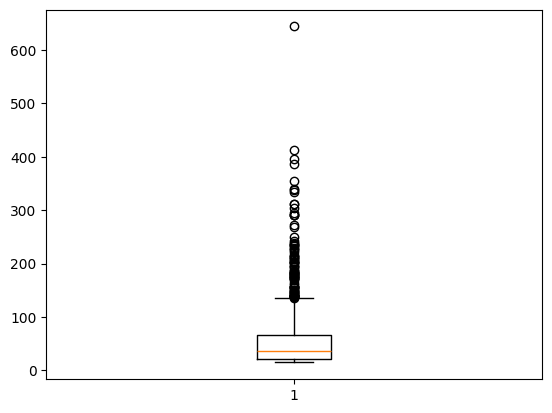

In [58]:
plt.boxplot(flight['ARRIVAL_DELAY'])

In [59]:
Q1= flight['ARRIVAL_DELAY'].quantile(0.25) #Q1 region
Q3=flight['ARRIVAL_DELAY'].quantile(0.75) #Q2 region
IQR=Q3-Q1 

In [60]:
IQR

np.float64(45.25)

In [61]:
len(flight)

1072

In [62]:
flight.drop(flight[ (flight['ARRIVAL_DELAY']>Q3+1.5*IQR) | (flight['ARRIVAL_DELAY']<Q1-1.5*IQR)].index,inplace=True) # dropping the outliers in arrival delay

In [63]:
len(flight)

986

In [64]:
flight['log(y)'] = np.log(flight['ARRIVAL_DELAY'] +0.00001 ) # transforming the response variable (adding 0.000001 to avoid error incase a log 0 is present)

In [65]:
X_2=flight[['LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','AIR_SYSTEM_DELAY','WEATHER_DELAY','DEPARTURE_DELAY']] #predictor variable for the new model
y_2=flight['log(y)'] 

In [66]:
X_con_2=sm.add_constant(X_2)
arr_del_stats_2=sm.OLS(y_2,X_con_2).fit()
arr_del_stats_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log(y)   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     2161.
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        01:57:38   Log-Likelihood:                 343.09
No. Observations:                 986   AIC:                            -674.2
Df Residuals:                     980   BIC:                            -644.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.7076      0.010    268.092      0.000       2.688       2.727
LATE_AIRCRAFT_DELAY     0.0191      0.000     40.192      0.000       0.018       0.020
AIRLINE_DELAY           0.0193      0.000     39.368      0.000       0.018       0.020
AIR_SYSTEM_DELAY        0.0203      0.000     58.918      0.000       0.020       0.021
WEATHER_DELAY           0.0195      0.001     28.038      0.000       0.018       0.021
DEPARTURE_DELAY         0.0009      0.000      2.234      0.026       0.000       0.002
==============================================================================
Omnibus:                       36.792   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.677
Skew:                          -0.367   Prob(JB):                     1.63e-11
Kurtosis:                       3.819   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
arr_del_stats_2p=pd.DataFrame(arr_del_stats_2.params)
arr_del_stats_2p.columns=['Coef']
arr_del_stats_2p['p-values']=arr_del_stats_2.pvalues
arr_del_stats_2p

,Coef,p-values
const,2.707571,0.000000e+00
LATE_AIRCRAFT_DELAY,0.019111,1.781589e-209
AIRLINE_DELAY,0.019317,4.990089e-204
AIR_SYSTEM_DELAY,0.020272,0.000000e+00
WEATHER_DELAY,0.019478,1.745813e-127
DEPARTURE_DELAY,0.000854,2.570335e-02


In [68]:
print("\nR-squared: {}% ".format(arr_del_stats_2.rsquared*100))


R-squared: 91.68525991830104% 


In [69]:
print("Balance_Hat = {a} + {b}*LATE_AIRCRAFT_DELAY +{c} * AIRLINE_DELAY+ {d}*AIR_SYSTEM_DELAY+ {e}*WEATHER_DELAY +{f}*DEPARTURE_DELAY  " 
      .format(a=arr_del_stats_2.params[0],b=arr_del_stats_2.params[1], c=arr_del_stats_2.params[2], d=arr_del_stats_2.params[3], e=arr_del_stats_2.params[4], f=arr_del_stats_2.params[5]))

Balance_Hat = 2.707571283434791 + 0.01911116233240263*LATE_AIRCRAFT_DELAY +0.01931738551132113 * AIRLINE_DELAY+ 0.02027226358562281*AIR_SYSTEM_DELAY+ 0.019478108752049902*WEATHER_DELAY +0.000854483316388857*DEPARTURE_DELAY  


/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_1389/3959621263.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .format(a=arr_del_stats_2.params[0],b=arr_del_stats_2.params[1], c=arr_del_stats_2.params[2], d=arr_del_stats_2.params[3], e=arr_del_stats_2.params[4], f=arr_del_stats_2.params[5]))


In [70]:
y_hat_2=arr_del_stats_2.fittedvalues#obtaining the fitted values
y_minus_yhat_2=arr_del_stats_2.resid #obtaining the residual values

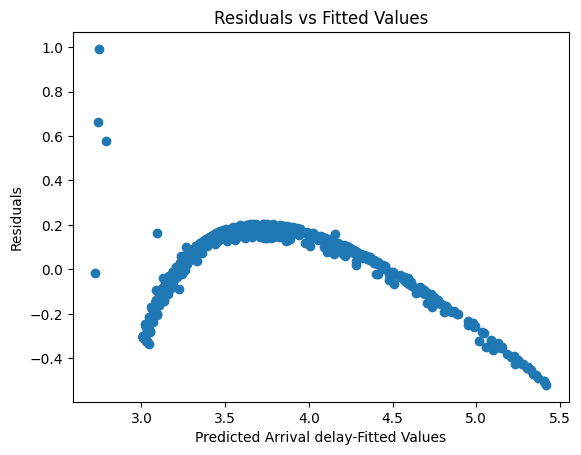

In [71]:
plt.scatter(y_hat_2,y_minus_yhat_2)
plt.xlabel('Predicted Arrival delay-Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

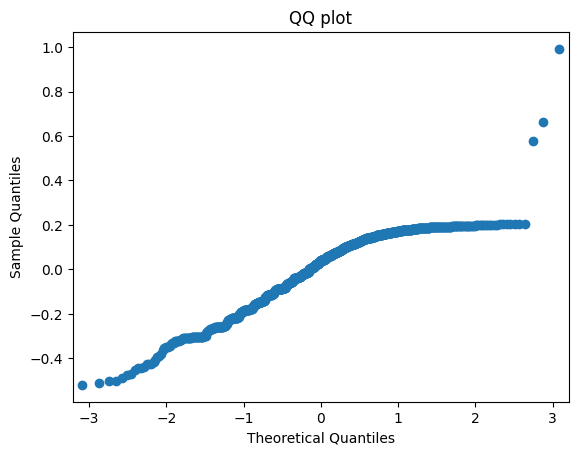

In [72]:
qq = sm.qqplot(arr_del_stats_2.resid)
plt.title("QQ plot")
plt.show()

We will use Residual plots and QQplot for identifying the three potential problems in our dataset- Non-linearity, Non constant variance of the error terms,Non-Normality of error

•The residuals depart from zero in a systematic fashion, they are negative for smaller values, positive for medium values and negative again for larger values. This tendency indicates the lack of linearity and constant variance of the regression function.

•The points fall reasonably close to a straight line initially but the points quickly departs from normality. The distribution of the error terms departs substantially from a normal distribution since the points are not in a straight line. Hence, normality is not satisfied

•No improvement from the previous model in sec 4.1. The normality improved slightly, but linearity and constant variance has gotten worse